In [1]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pathlib
from PIL import Image

import cv2
sns.set_style('darkgrid')
import plotly.express as px

In [4]:
train_brain_dataset = "dataset/Training"

data = []

In [5]:
for tumortype in os.listdir(train_brain_dataset):
    tumortype_path = os.path.join(train_brain_dataset, tumortype)
    

    for filename in os.listdir(tumortype_path):
        img_path = os.path.join(tumortype_path, filename)
        
        label = tumortype
        
        data.append((img_path, label))

train = pd.DataFrame(data, columns=['image_path', 'label'])

In [6]:
train

,image_path,label
0,dataset/Training\glioma\Tr-glTr_0000.jpg,glioma
1,dataset/Training\glioma\Tr-glTr_0001.jpg,glioma
2,dataset/Training\glioma\Tr-glTr_0002.jpg,glioma
3,dataset/Training\glioma\Tr-glTr_0003.jpg,glioma
4,dataset/Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,dataset/Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,dataset/Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,dataset/Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,dataset/Training\pituitary\Tr-pi_1455.jpg,pituitary


In [7]:
test_brain_dataset = "dataset/Testing"
data = []


for tumortype in os.listdir(test_brain_dataset):
    tumortype_path = os.path.join(test_brain_dataset, tumortype)
    
    
    for filename in os.listdir(tumortype_path):
        img_path = os.path.join(tumortype_path, filename)
    
        
        label = tumortype
        
    
        data.append((img_path, label))


test = pd.DataFrame(data, columns=['image_path', 'label'])
test

,image_path,label
0,dataset/Testing\glioma\Te-glTr_0000.jpg,glioma
1,dataset/Testing\glioma\Te-glTr_0001.jpg,glioma
2,dataset/Testing\glioma\Te-glTr_0002.jpg,glioma
3,dataset/Testing\glioma\Te-glTr_0003.jpg,glioma
4,dataset/Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,dataset/Testing\pituitary\Te-pi_0295.jpg,pituitary
1307,dataset/Testing\pituitary\Te-pi_0296.jpg,pituitary
1308,dataset/Testing\pituitary\Te-pi_0297.jpg,pituitary
1309,dataset/Testing\pituitary\Te-pi_0298.jpg,pituitary


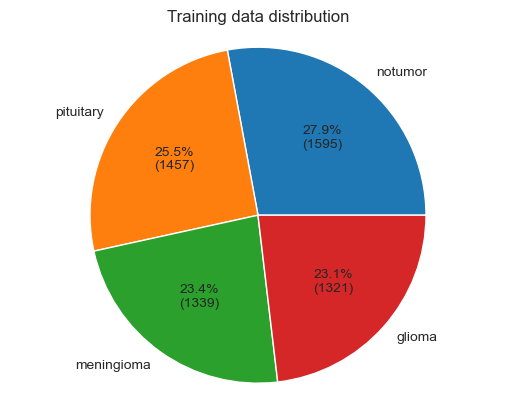

In [8]:
data_distribution = train.label.value_counts()

def custom_autopct(pct):
    total = sum(data_distribution)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)


# pie chart for data balance
plt.pie(data_distribution, labels = data_distribution.index, autopct=custom_autopct)
plt.title("Training data distribution")
plt.axis("equal")
plt.show()

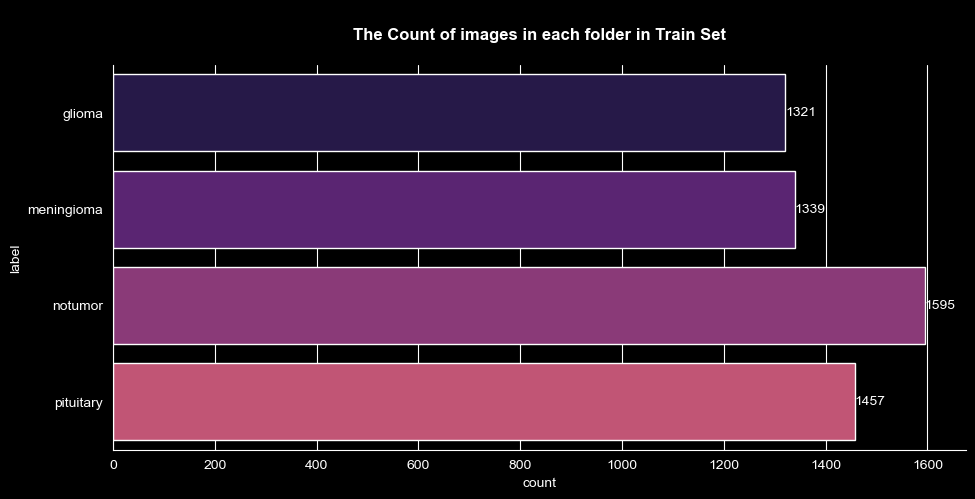

In [9]:

plt.style.use('dark_background')  # Setting dark background style
sns.set_palette('magma')
fig, ax = plt.subplots(figsize=(11, 5), facecolor='black')  # Setting black background

for i in ["top", "right"]:
    ax.spines[i].set_visible(False)

x = sns.countplot(data=train, y=train["label"])

for container in x.containers:
    x.bar_label(container)

plt.title("\nThe Count of images in each folder in Train Set\n", weight="bold", color='white')  # Adjusting title color

plt.show()


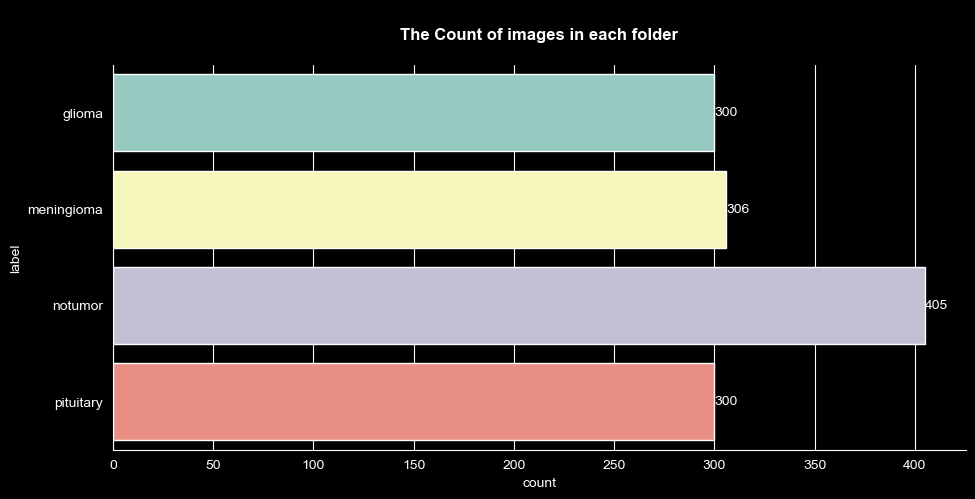

In [10]:
plt.style.use('dark_background')  # Setting dark background style

fig, ax = plt.subplots(figsize=(11, 5), facecolor='black')  # Setting black background

for i in ["top", "right"]:
    ax.spines[i].set_visible(False)

x = sns.countplot(data=test, y=test["label"])

for container in x.containers:
    x.bar_label(container)

plt.title("\nThe Count of images in each folder\n", weight="bold", color='white')  # Adjusting title color

plt.show()


### SPLITING DATA: TRAIN TEST AND VALIDATION

In [11]:
train_data, valid_data = train_test_split(train, test_size=0.2, random_state=42, shuffle = True , stratify=train['label'])

print(f"Training set shape: {train_data.shape}")
print(f"Testing set shape: {test.shape}")
print(f"Validation set shape: {valid_data.shape}")

Training set shape: (4569, 2)
Testing set shape: (1311, 2)
Validation set shape: (1143, 2)


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,  BatchNormalization, Activation, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

## IMAGE GENERATION

In [50]:
batch_size = 32
image_size = (224, 224)
channels = 3

train_datagen = ImageDataGenerator()

valid_test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    shuffle = True, 
    batch_size=batch_size,
    class_mode='categorical',  
    color_mode = 'rgb'
)

valid_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=valid_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    shuffle = True, 
    batch_size=batch_size,class_mode='categorical',
    color_mode = 'rgb'
)

test_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    shuffle=False,  
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'rgb'
)

Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


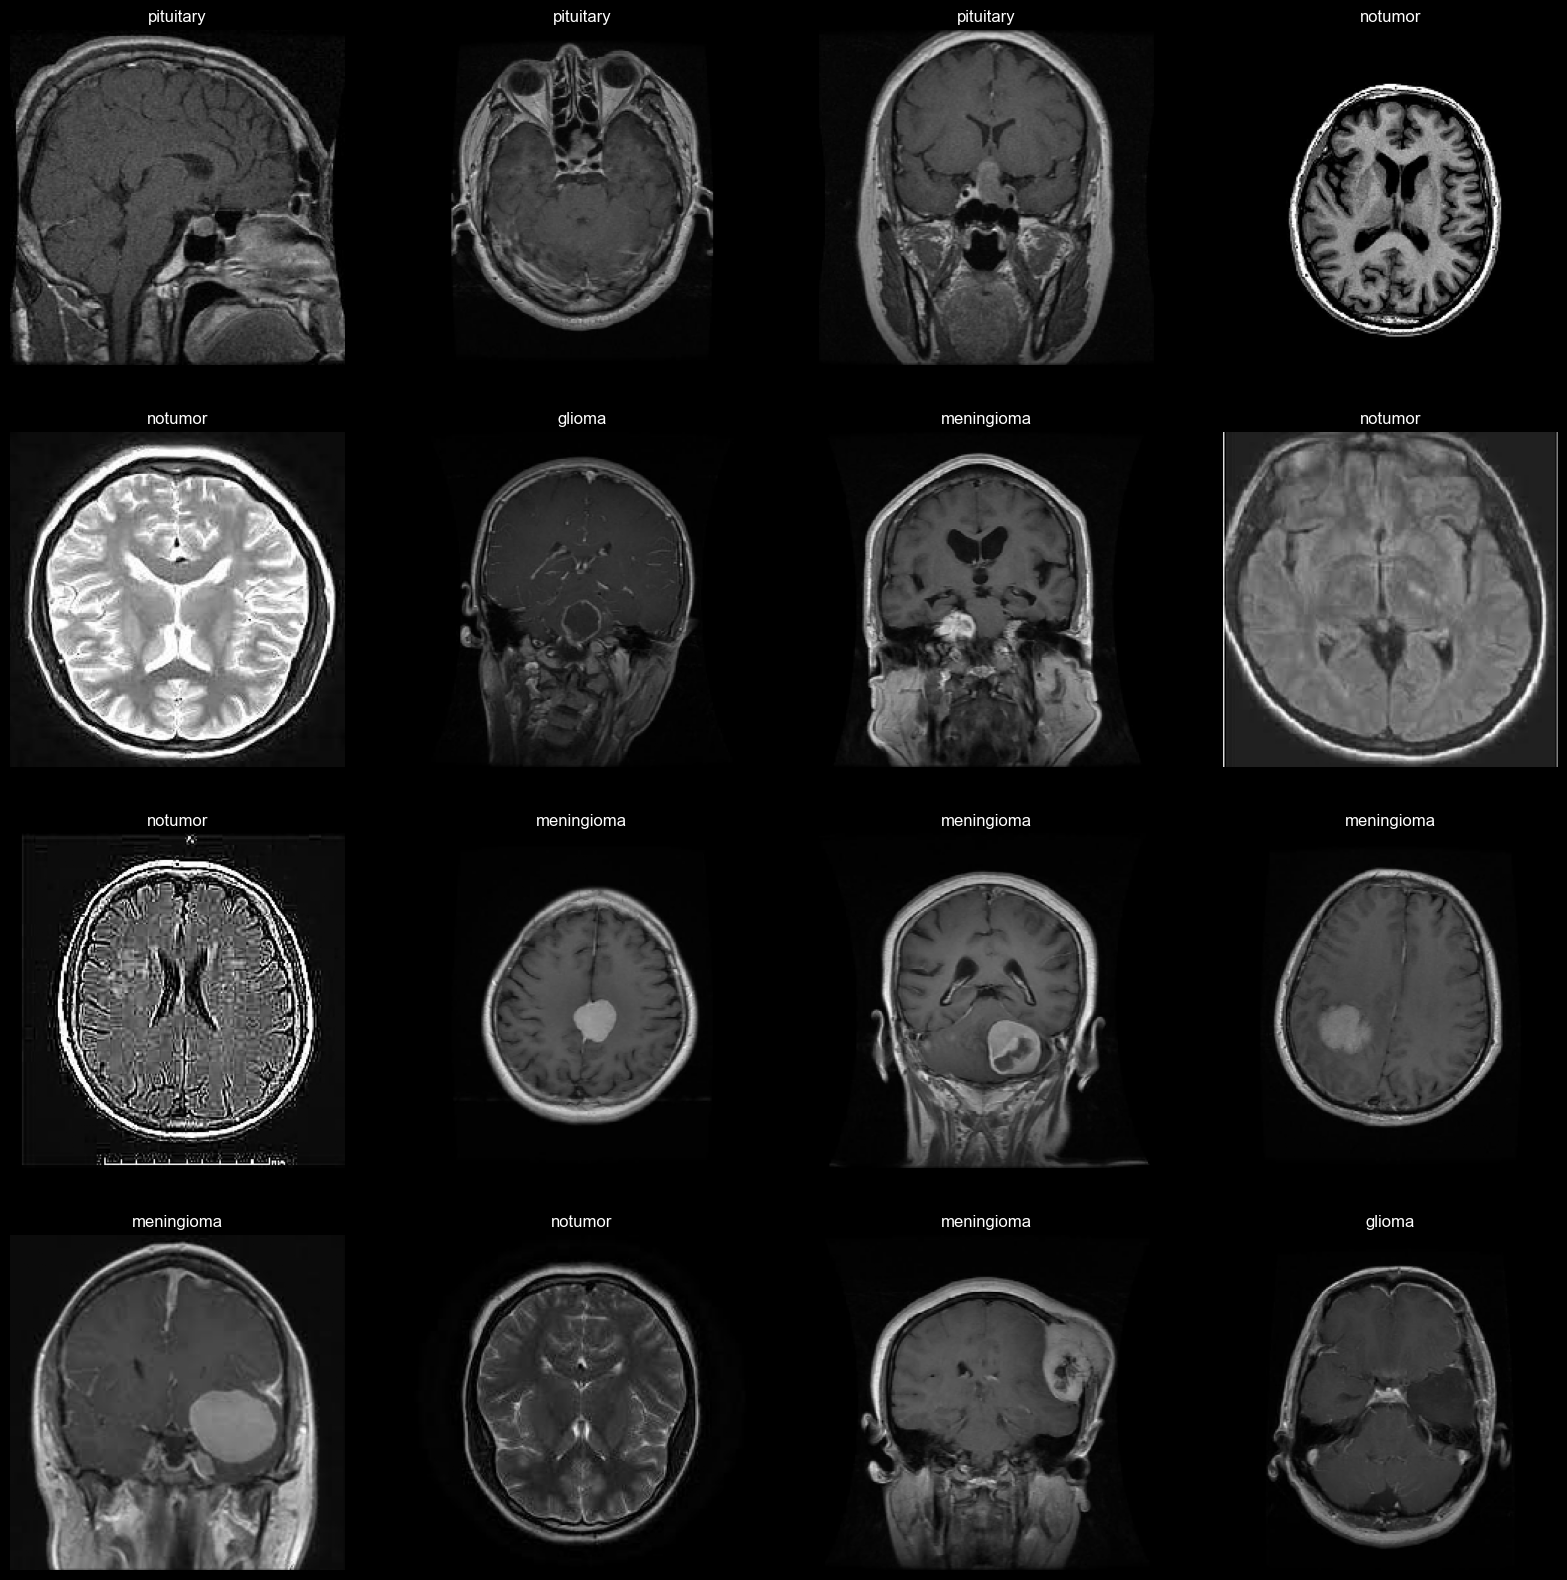

In [14]:
g_dict = train_generator.class_indices      
classes = list(g_dict.keys())       
images, labels = next(train_generator)      

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'white', fontsize= 12)
    plt.axis('off')
plt.show()



In [15]:
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


### MODEL 2 EfficientNetB3

In [49]:
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax

img_shape = (224, 224,3)
class_count = len(train_generator.class_indices)

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(0.0016), bias_regularizer=regularizers.l1(0.0006)),
    Activation('relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count),
    Activation('softmax')
])

model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ ?                      │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 10,696,232 (40.80 MB)

 Non-trainable params: 87,303 (341.03 KB)

In [51]:
epochs = 10   

history = model.fit(x= train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, 
                    validation_steps= None, shuffle= False)

Epoch 1/10


C:\Users\Kanika\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 36/143 ━━━━━━━━━━━━━━━━━━━━ 45:29 26s/step - accuracy: 0.6510 - loss: 1.6927

KeyboardInterrupt: 

In [18]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

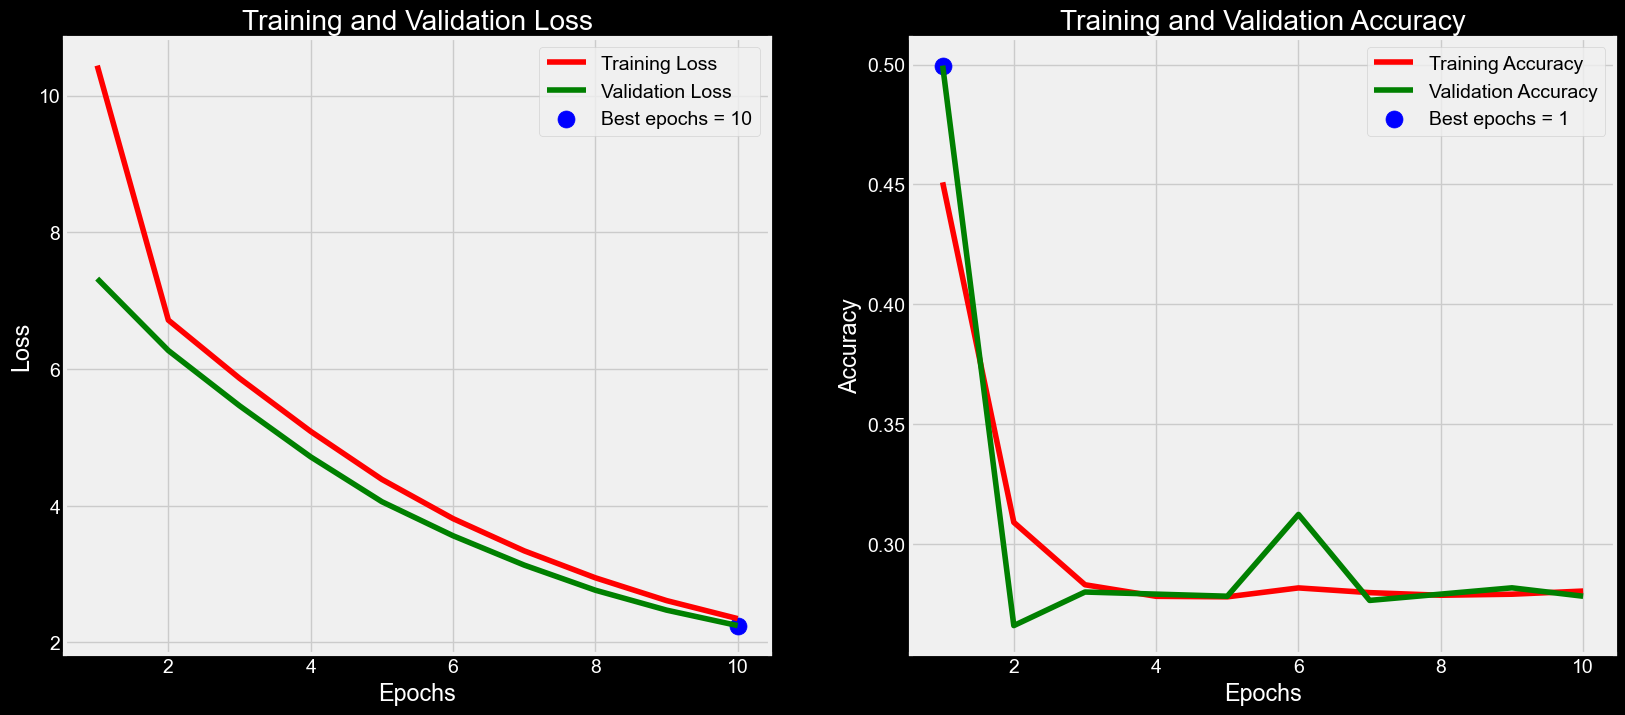

In [19]:
plt.style.use('dark_background')
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')

plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.tight_layout
plt.show();

In [20]:
ts_length = len(test)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_generator, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_generator, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_generator, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2554 - loss: 2.2493
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2721 - loss: 2.2432


C:\Users\Kanika\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 3.2895e-04 - loss: 2.3039
Train Loss:  2.2455685138702393
Train Accuracy:  0.28125
--------------------
Validation Loss:  2.2425661087036133
Validation Accuracy:  0.27796053886413574
--------------------
Test Loss:  2.310941696166992
Test Accuracy:  0.003289473708719015


In [22]:
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step


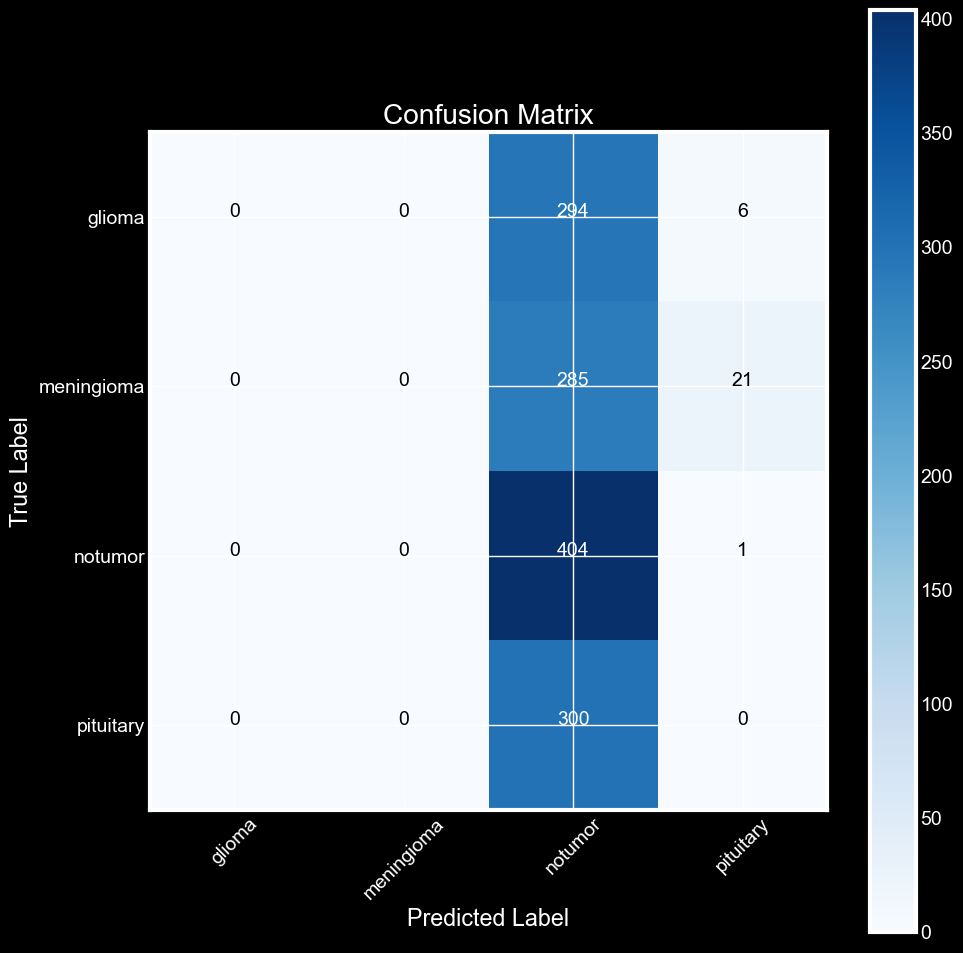

In [23]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.style.use('dark_background')

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [24]:
print(classification_report(test_generator.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       300
  meningioma       0.00      0.00      0.00       306
     notumor       0.31      1.00      0.48       405
   pituitary       0.00      0.00      0.00       300

    accuracy                           0.31      1311
   macro avg       0.08      0.25      0.12      1311
weighted avg       0.10      0.31      0.15      1311



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


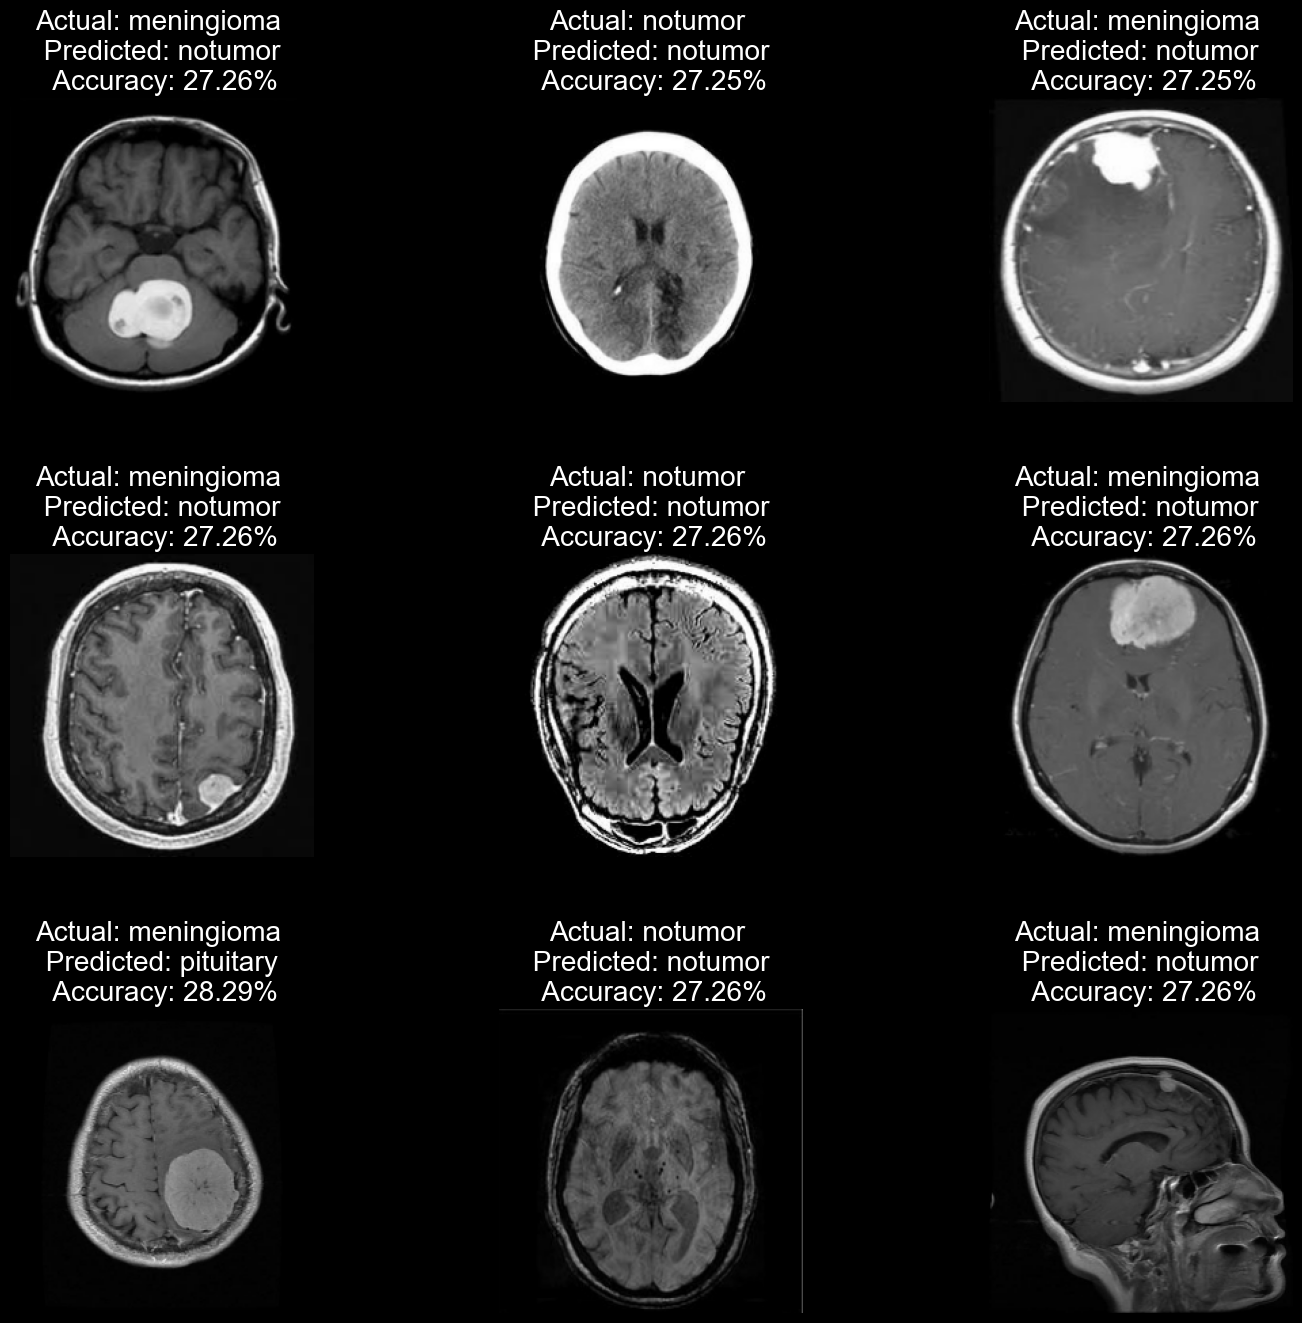

In [29]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [30]:
scores = model.evaluate(test_generator)

41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.1597 - loss: 2.2781


In [33]:
for images, labels in true_test_ds.take(1):
    for i in range(32):
        
    
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = test_classes[labels[i]]
        
        print(f"Actual: {actual_class}, Predicted: {predicted_class}, Accuracy: {confidence}% \n")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Actual: meningioma, Predicted: notumor, Accuracy: 27.26% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Actual: notumor, Predicted: notumor, Accuracy: 27.26% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Actual: notumor, Predicted: notumor, Accuracy: 27.27% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Actual: notumor, Predicted: notumor, Accuracy: 27.26% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Actual: meningioma, Predicted: notumor, Accuracy: 27.37% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Actual: glioma, Predicted: notumor, Accuracy: 27.26% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Actual: notumor, Predicted: notumor, Accuracy: 27.25% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Actual: notumor, Predicted: notumor, Accuracy: 27.25% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Actual: glioma, Predicted: notumor, Accuracy: 27.26% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Actual: pituitary, Predicted: notumor, Accuracy: 27.26% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Actua

In [41]:
# Save the model in SavedModel format
tf.saved_model.save(model, 'C:/Users/Kanika/Desktop/Brain tumor classifier/Brain tumor classifier')


INFO:tensorflow:Assets written to: C:/Users/Kanika/Desktop/Brain tumor classifier/Brain tumor classifier\assets


INFO:tensorflow:Assets written to: C:/Users/Kanika/Desktop/Brain tumor classifier/Brain tumor classifier\assets
